In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
# NLP
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [3]:
df = pd.read_csv("data/data_clean.csv").iloc[:, 1:]
# Remove jobs not pertaining to data science
df = df[df.title.notnull()].reset_index(drop=True)

In [4]:
df.location.value_counts()

San Francisco      271
Los Angeles         90
San Diego           80
Santa Clara         78
Mountain View       72
                  ... 
Highland             1
West Menlo Park      1
Rocklin              1
San Dimas            1
Jamul                1
Name: location, Length: 134, dtype: int64

In [5]:
# Job description length
df["desc_len"] = df["Job Description"].apply(lambda x: len(x))
df["desc_len"]

0       3390
1       3633
2       3986
3       3093
4       1188
        ... 
1267    3669
1268    1703
1269    1901
1270    3826
1271    5668
Name: desc_len, Length: 1272, dtype: int64

In [6]:
 df.describe()

Rating   min_salary   max_salary   avg_salary          age  \
count  1272.000000  1272.000000  1272.000000  1272.000000  1272.000000   
mean      3.452987    63.329403   103.198899    83.264151    23.709119   
std       1.512822    51.218781    81.096870    65.890255    33.980283   
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000   
25%       3.400000    -1.000000    -1.000000    -1.000000     4.000000   
50%       3.900000    69.000000   118.000000    93.500000    13.000000   
75%       4.200000   106.000000   167.000000   135.125000    31.000000   
max       5.000000   212.000000   334.000000   271.500000   338.000000   

            python            R        spark          aws        excel  \
count  1272.000000  1272.000000  1272.000000  1272.000000  1272.000000   
mean      0.648585     0.262579     0.249214     0.250000     0.459906   
std       0.477600     0.440208     0.432728     0.433183     0.498586   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     0.000000     0.250000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               sql      desc_len  
count  1272.000000   1272.000000  
mean      0.582547   3418.022013  
std       0.493333   1657.696620  
min       0.000000    132.000000  
25%       0.000000   2229.000000  
50%       1.000000   3352.000000  
75%       1.000000   4368.000000  
max       1.000000  17777.000000

In [7]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Location', 'Size',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'title',
       'min_salary', 'max_salary', 'avg_salary', 'seniority', 'company_txt',
       'location', 'age', 'python', 'R', 'spark', 'aws', 'excel', 'sql',
       'desc_len'],
      dtype='object')

<AxesSubplot:>

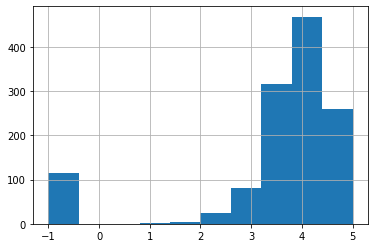

In [8]:
df.Rating.hist()

<AxesSubplot:>

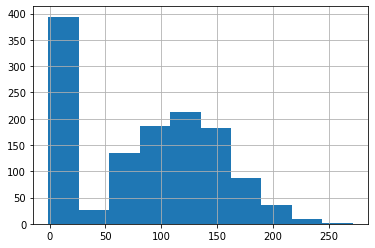

In [9]:
df.avg_salary.hist()

<AxesSubplot:>

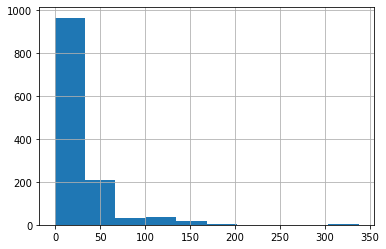

In [10]:
df.age.hist()

<AxesSubplot:>

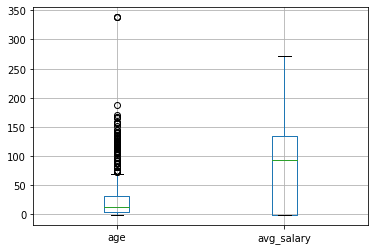

In [11]:
df.boxplot(column=['age', 'avg_salary'])

<AxesSubplot:>

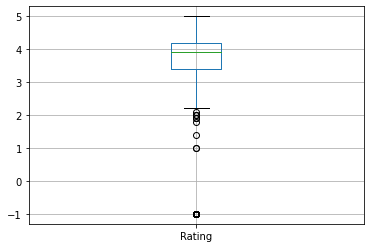

In [12]:
df.boxplot(column=['Rating'])

In [13]:
corr = df[['age', 'avg_salary', 'Rating', 'desc_len']].corr()
corr

age  avg_salary    Rating  desc_len
age         1.000000    0.196089  0.171007  0.264236
avg_salary  0.196089    1.000000  0.312052  0.224429
Rating      0.171007    0.312052  1.000000  0.085475
desc_len    0.264236    0.224429  0.085475  1.000000

<AxesSubplot:>

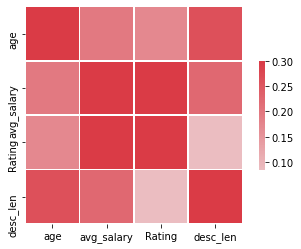

In [14]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, vmax=.3, center=0, cmap=cmap,
    square=True, linewidths=.5, cbar_kws={'shrink': .5})

In [15]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Location', 'Size',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'title',
       'min_salary', 'max_salary', 'avg_salary', 'seniority', 'company_txt',
       'location', 'age', 'python', 'R', 'spark', 'aws', 'excel', 'sql',
       'desc_len'],
      dtype='object')

## Bar plots of categorical data

In [16]:
# Categorical
df_cat = df[['Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt',
    'location', 'python', 'R', 'spark', 'aws', 'excel', 'sql', 'seniority']]

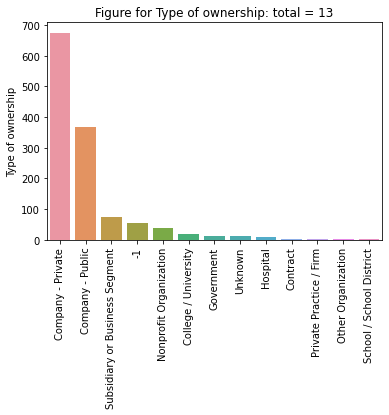

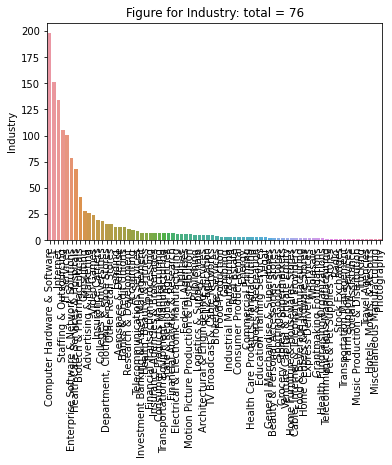

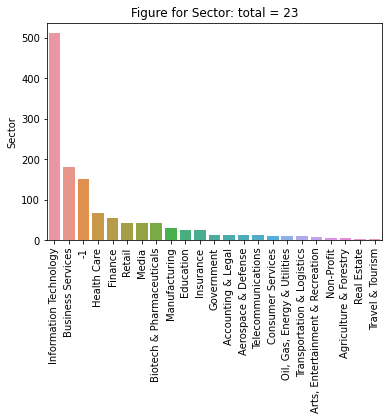

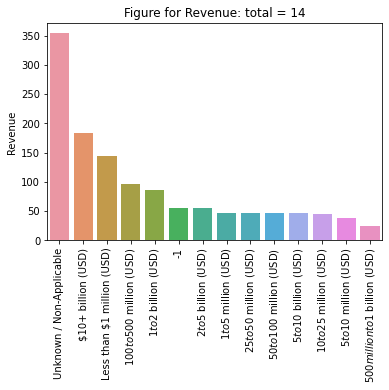

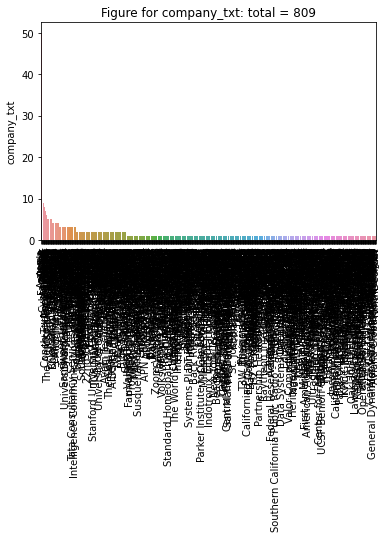

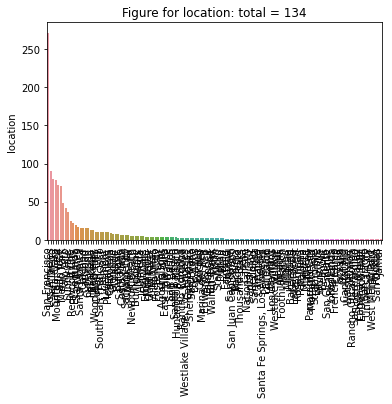

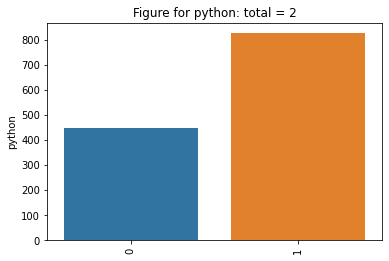

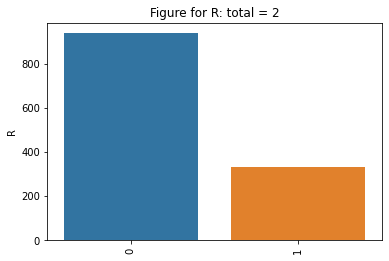

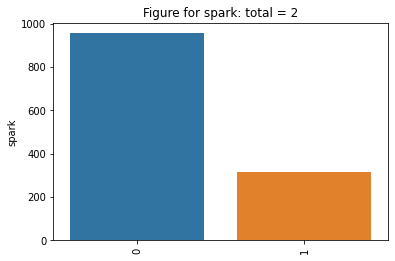

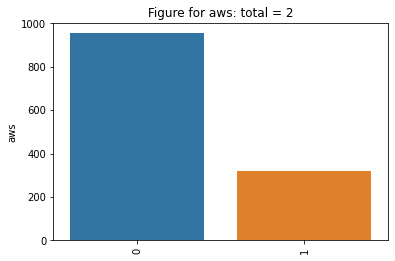

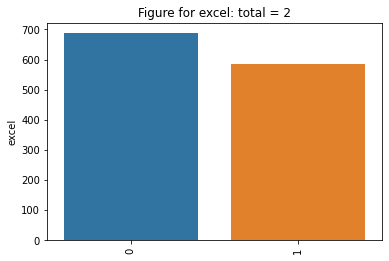

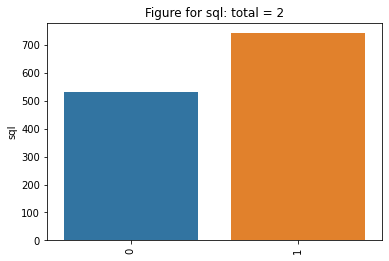

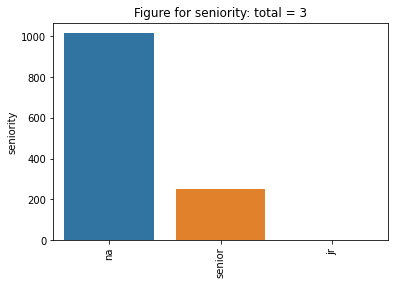

In [17]:
# Barplots of categorical features
for category in df_cat.columns:
    cat_values = df[category].value_counts()
    fig = sns.barplot(x=cat_values.index, y=cat_values)
    plt.title("Figure for {}: total = {}".format(category, len(cat_values)))
    fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
    plt.show()

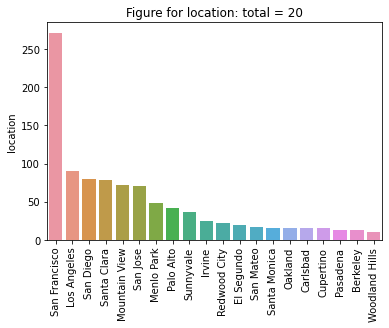

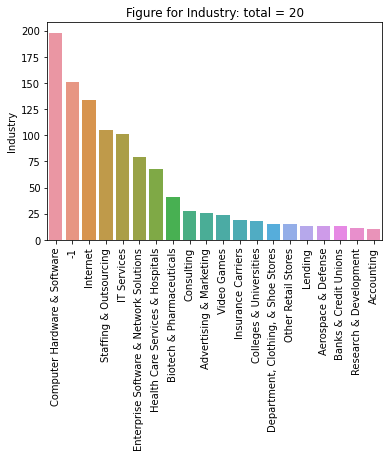

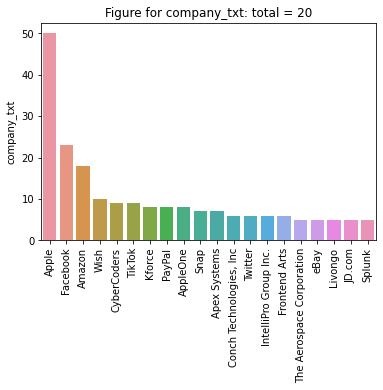

In [18]:
# Limit features with high number of categories
for category in ['location', 'Industry', 'company_txt']:
    cat_values = df[category].value_counts()[:20]
    fig = sns.barplot(x=cat_values.index, y=cat_values)
    plt.title("Figure for {}: total = {}".format(category, len(cat_values)))
    fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
    plt.show()

In [19]:
df.columns 

Index(['Job Title', 'Job Description', 'Rating', 'Location', 'Size',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'title',
       'min_salary', 'max_salary', 'avg_salary', 'seniority', 'company_txt',
       'location', 'age', 'python', 'R', 'spark', 'aws', 'excel', 'sql',
       'desc_len'],
      dtype='object')

## Pivot tables

In [20]:
pd.pivot_table(df, index='title', values='avg_salary')

avg_salary
title                       
Data Analysis      50.455422
Data Engineering   78.585366
Data Science      101.178117
ML Engineering    118.706422

In [21]:
pd.pivot_table(df, index=['title', 'seniority'], values='avg_salary')

avg_salary
title            seniority            
Data Analysis    jr          20.250000
                 na          43.448598
                 senior      75.559783
Data Engineering na          75.042857
                 senior      99.250000
Data Science     na          92.800971
                 senior     131.994048
ML Engineering   na         111.875706
                 senior     148.195122

In [36]:
pd.pivot_table(df, index='location', values='avg_salary').sort_values('avg_salary', ascending=False).head(15)

avg_salary
location                  
Los Altos       183.833333
Belmont         165.500000
Brisbane        152.000000
Hayward         145.000000
Rosemead        138.000000
Palmdale        137.000000
San Rafael      135.500000
Santa Clara     133.596154
East Palo Alto  132.375000
Pleasanton      131.000000
San Carlos      123.875000
Marina del Rey  123.000000
Walnut          123.000000
San Dimas       117.000000
Aliso Viejo     114.000000

Next we will label the data based on locational avg_salary quantiles

In [48]:
# Group by location and aggregate by mean
location_salaries = df.groupby('location').avg_salary.mean()
# Compute quantiles: 25, 50, 75
q25 = location_salaries.quantile(.25)
q50 = location_salaries.quantile(.5)
q75 = location_salaries.quantile(.75)
# Label locations
location_labels = {}
for location in location_salaries.index:
    salary = location_salaries[location]
    # Ensure unique locations 
    if location in location_labels.keys():
        print("ValueError: {} already in dictionat".format(location))
    # Fill dictionary
    if salary < q25:
        location_labels[location] = 1
    elif salary > q75:
        location_labels[location] = 4
    elif (salary >= q25) and (salary < q50):
        location_labels[location] = 2
    else:
        location_labels[location] = 3
# Label data
df["locational_salary_quantiles"] = df.location.apply(
    lambda x: location_labels[x])
df["locational_salary_quantiles"].value_counts()

3    531
2    385
4    266
1     90
Name: locational_salary_quantiles, dtype: int64

In [49]:
pd.pivot_table(df, index=['location', 'title'], values='avg_salary').sort_values('avg_salary', ascending=False).head(50)

avg_salary
location       title                       
Los Altos      Data Science      205.500000
Woodland Hills Data Engineering  195.000000
Pleasanton     ML Engineering    182.500000
Los Altos      ML Engineering    173.000000
Newark         ML Engineering    170.500000
San Bruno      Data Science      170.500000
Brisbane       Data Analysis     170.000000
Belmont        ML Engineering    165.500000
Emeryville     Data Science      164.500000
Alameda        Data Engineering  160.500000
Santa Clara    ML Engineering    158.145161
Sherman Oaks   Data Science      156.250000
Cupertino      Data Science      154.000000
Berkeley       ML Engineering    151.500000
Redwood City   ML Engineering    151.100000
East Palo Alto Data Science      150.500000
Campbell       Data Engineering  148.500000
Newark         Data Science      148.000000
Cupertino      ML Engineering    147.500000
Culver City    ML Engineering    145.000000
Hayward        ML Engineering    145.000000
San Mateo      Data Science      143.000000
Santa Barbara  ML Engineering    142.000000
East Palo Alto ML Engineering    142.000000
Pleasanton     Data Science      141.666667
Livermore      Data Science      140.500000
Marina del Rey ML Engineering    140.000000
Pleasanton     Data Engineering  139.250000
Rosemead       Data Analysis     138.000000
Palmdale       Data Analysis     137.000000
Alameda        Data Science      137.000000
Glendale       ML Engineering    136.500000
Rancho Cordova Data Science      136.500000
San Jose       ML Engineering    136.250000
San Rafael     ML Engineering    135.500000
Santa Clara    Data Engineering  134.866667
Brisbane       Data Science      134.000000
San Francisco  ML Engineering    132.822581
Walnut Creek   Data Science      132.500000
Irvine         Data Science      132.214286
Milpitas       ML Engineering    132.000000
San Mateo      ML Engineering    132.000000
Glendale       Data Science      130.500000
San Jose       Data Science      130.194444
Carlsbad       Data Science      128.750000
Santa Clara    Data Science      127.705882
Woodland Hills Data Science      127.000000
Palo Alto      ML Engineering    126.884615
Sunnyvale      ML Engineering    126.142857
Fremont        Data Science      124.000000

In [50]:
pd.pivot_table(df, index=['location', 'title'], values='avg_salary', aggfunc='count').sort_values('avg_salary', ascending=False).head(50)

avg_salary
location            title                       
San Francisco       Data Science             106
                    Data Analysis             66
                    ML Engineering            62
Los Angeles         Data Analysis             42
San Francisco       Data Engineering          37
Santa Clara         ML Engineering            31
San Diego           Data Analysis             30
Mountain View       Data Science              27
                    ML Engineering            26
Los Angeles         Data Science              24
San Jose            Data Engineering          24
San Diego           Data Science              22
Menlo Park          Data Science              20
Los Angeles         Data Engineering          19
San Jose            Data Science              18
Sunnyvale           Data Engineering          18
Santa Clara         Data Science              17
San Jose            Data Analysis             17
Palo Alto           Data Science              16
San Diego           Data Engineering          16
Santa Clara         Data Analysis             15
                    Data Engineering          15
Menlo Park          Data Analysis             14
Palo Alto           ML Engineering            13
Menlo Park          Data Engineering          12
San Jose            ML Engineering            12
San Diego           ML Engineering            12
Mountain View       Data Analysis             10
                    Data Engineering           9
Oakland             Data Analysis              9
Irvine              Data Engineering           9
Palo Alto           Data Engineering           9
Carlsbad            Data Analysis              9
Redwood City        Data Science               9
Santa Monica        Data Analysis              8
Irvine              Data Analysis              8
Woodland Hills      Data Analysis              8
El Segundo          Data Analysis              8
Irvine              Data Science               7
Sunnyvale           ML Engineering             7
                    Data Science               6
South San Francisco Data Engineering           6
El Segundo          Data Engineering           6
Cupertino           Data Analysis              6
Culver City         Data Science               6
Sunnyvale           Data Analysis              6
Pleasanton          Data Science               6
Livermore           Data Analysis              6
Orange              Data Analysis              6
Berkeley            Data Science               6

In [51]:
pd.pivot_table(df[df.title == 'Data Science'], index=['location', 'title'], values='avg_salary').sort_values('avg_salary', ascending=False).head(15)

avg_salary
location       title                   
Los Altos      Data Science  205.500000
San Bruno      Data Science  170.500000
Emeryville     Data Science  164.500000
Sherman Oaks   Data Science  156.250000
Cupertino      Data Science  154.000000
East Palo Alto Data Science  150.500000
Newark         Data Science  148.000000
San Mateo      Data Science  143.000000
Pleasanton     Data Science  141.666667
Livermore      Data Science  140.500000
Alameda        Data Science  137.000000
Rancho Cordova Data Science  136.500000
Brisbane       Data Science  134.000000
Walnut Creek   Data Science  132.500000
Irvine         Data Science  132.214286

In [52]:
# Data science jobs only
df_ds = df[df.title == 'Data Science']

In [53]:
# Columns selection for pivot tables
df_pivots = df_ds[['Industry', 'Sector', 'Revenue', 'python', 'R', 'spark', 'aws', 'excel', 'sql', 'desc_len', 'avg_salary']]

In [54]:
for i in df_pivots.columns[:-1]:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values(by='avg_salary', ascending=False))
    print("-"*75)

Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       179.000000
Miscellaneous Manufacturing               161.000000
Wholesale                                 160.500000
Real Estate                               158.500000
Department, Clothing, & Shoe Stores       151.625000
Education Training Services               144.250000
Farm Support Services                     144.000000
Transportation Equipment Manufacturing    144.000000
Photography                               140.000000
Health Care Services & Hospitals          136.447368
Utilities                                 131.800000
Financial Analytics & Research            130.750000
Telecommunications Services               130.375000
Sporting Goods Stores                     128.500000
Federal Agencies                          128.166667
Aerospace & Defense                       127.700000
Health Care Products Manufacturing   

In [55]:
pd.pivot_table(df_pivots, index='Revenue', columns='python', values='avg_salary', aggfunc="count")

python                               0     1
Revenue                                     
$1 to $2 billion (USD)             2.0  25.0
$1 to $5 million (USD)             3.0   9.0
$10 to $25 million (USD)           1.0  11.0
$10+ billion (USD)                12.0  54.0
$100 to $500 million (USD)         4.0  30.0
$2 to $5 billion (USD)             NaN  11.0
$25 to $50 million (USD)           5.0   9.0
$5 to $10 billion (USD)            1.0  24.0
$5 to $10 million (USD)            1.0   8.0
$50 to $100 million (USD)          2.0   9.0
$500 million to $1 billion (USD)   NaN   3.0
-1                                 2.0  15.0
Less than $1 million (USD)         7.0  34.0
Unknown / Non-Applicable          19.0  92.0

## Word clouds of different job roles

In [56]:
df.title.value_counts()

Data Analysis       415
Data Science        393
Data Engineering    246
ML Engineering      218
Name: title, dtype: int64

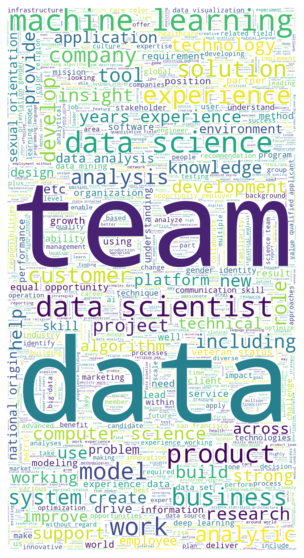

In [31]:
# Data science
words = " ".join(df_ds['Job Description'])

# nltk.download('stopwords')
# nltk.download('punkt')

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

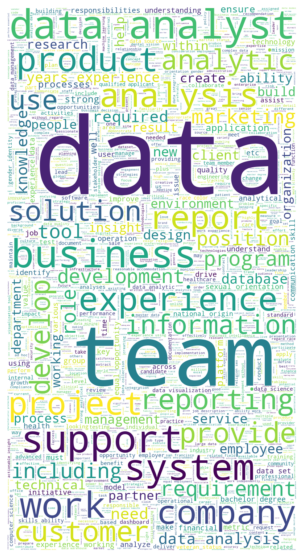

In [32]:
# Data analytics
df_da = df[df.title == "Data Analysis"]
words = " ".join(df_da['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

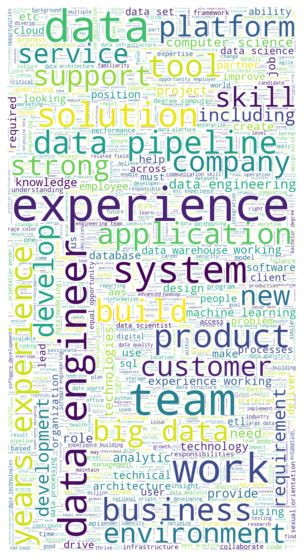

In [33]:
# Data Engineering
df_de = df[df.title == "Data Engineering"]
words = " ".join(df_de['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

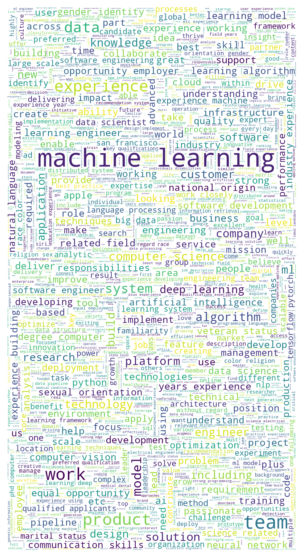

In [34]:
# ML Engineering
df_ml = df[df.title == "ML Engineering"]
words = " ".join(df_ml['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [35]:
# save data
df.to_csv("data/data_clean.csv")